# Simulations of the semi-discrete prey-predator models

In [1]:
#Dependancies
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## 1. Model without interaction

### 1.1 Semi-discrete model

In [18]:
#Definition of the semi-discrete model
def sd_model(
    xy: list,
    t = np.linspace(0,20,201),
    r: float = 0.5,
    K: float = 10,
    a: float = 20,
    c: float = 20,
    m: float = 0.5,
    gamma: float = 0.8,
) -> list:
    
    '''This model is a continuous model that describes the evolution of a pest population x and a predator population y 
    
    Param:
        xy: a list of values of [x,y] at a time t_n
        r: growth rate
        K: carrying capacity
        a: search rate
        c: half-saturation constant
        m: death rate
        gamma: conversion factor
        
    Return:
        dx, dy: a list of the two population size of x and y at time t_{n+1}'''
    
    #Initialisation
    x = xy[0]
    y = xy[1]

    #Continuous part of the model
    dx = r*x * (1 - x/K) - a*x*(c + x) * y
    dy = gamma * a*x*(c + x) * y - m*y

    return dx, dy

#Definition of the parameters of the discrete part mu and T
    ##mu: release rate
    ##T: release period 
mu = 1
T = 5

#Initial condition
##Definition of y0 as the "equilibrium"
m=0.5
y0 = mu*T/(1 - np.exp(-m*T))
x0y0 = [0, y0]

#Time points
t = np.linspace(0,20,201)

#Store solution in arrays
x = np.empty_like(t)
y = np.empty_like(t)

#Record initial conditions
x[0] = x0y0[0]
y[0] = x0y0[1]





release period at 5.0
release period at 10.0
release period at 15.0


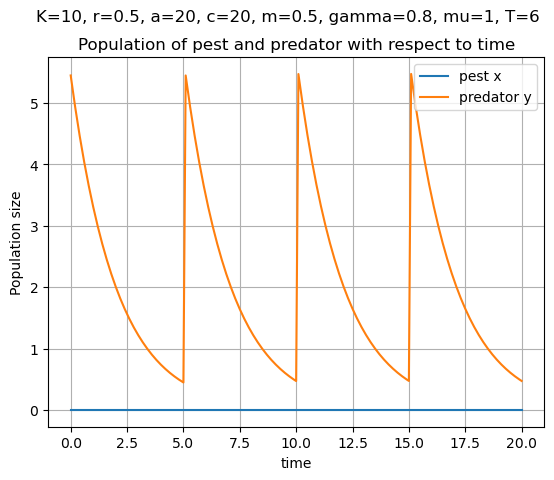

In [3]:
#Solve ODE
##we solve the ode point by point and change the equation to the discrete if t is a multiple of T
##It means that we use the value of a point to get the value of the next
for i in range(1,len(t)):
    #Span for next time step
    tspan = [t[i-1],t[i]] 
    #Solve for next step
    xy = odeint(sd_model,x0y0,tspan)
    x[i] = xy[1][0] #store the value of x
    if t[i-1] % T == 0 and t[i-1] > 0:
        print('release period at', t[i-1])
        y[i] = y[i-1] + mu*T #store the value of y if t is a multiple of T
    else:
        y[i] = xy[1][1] #store the value of y if t is not a multiple of T
    #next initial condition
    x0y0 = [x[i],y[i]]


    
#Plot results
plt.plot(t, x, label = 'pest x')
plt.plot(t, y, label = 'predator y')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator with respect to time')
plt.suptitle('K=10, r=0.5, a=20, c=20, m=0.5, gamma=0.8, mu=1, T=6')
plt.legend()
plt.grid()
plt.show()

What can be improved is that the jump is at the beginning. Maybe we can change that in the modulo part or the [i] vs [i-1] part of the model.

## 1.2 Simulations of the periodic solution and many different initial values

Check if the condition of GAS is filled

$\mu = 1$  
$c > K$  
$\frac{rmc}{a} = 0.25$  
$\mu > \frac{rmc}{a}$  
The condition is satisfied.


Later, we can do simulations where only LAS condition is satisfied, then when even LAS condition is not satisfied.

Implement the functions $x_p(t)$ and $y_p(t)$, the periodic solution

In [4]:
#The implementation is not useful. I need to only put the correct initial condition
#x_p(t) will be defined as np.zeros_like(t)

#y_p(t)
#def y_p(t, m, mu, T):
    #'''This function is the periodic solution of y
    
    #Param:
        #t: time point(s)
        #m: mortality rate in the model
        #mu: release rate in the model
        #T: release period in the model
        
    #Return:
        #result: y_p evaluated in t'''
    
    #result = mu*T/(1 - np.exp(-m*T)) * np.exp(-m * (t % T))
    #return result

Initialization of the model

In [5]:
#Definition of the parameters of the discrete part mu and T
    ##mu: release rate
    ##T: release period 
mu = 1
T = 5

#Time points
t = np.linspace(0,20,201)


Initial conditions for the periodic solution

In [6]:
m=0.5
y_p_0 = mu*T/(1 - np.exp(-m*T))
xy_p_0 = [0, y_p_0]

In [7]:
#Store solution in arrays
x_p = np.empty_like(t)
y_p = np.empty_like(t)

#Record initial conditions
x_p[0] = xy_p_0[0]
y_p[0] = xy_p_0[1]

In [8]:
#Solve ODE
##we solve the ode point by point and change the equation to the discrete if t is a multiple of T
##It means that we use the value of a point to get the value of the next
for i in range(1,len(t)):
    #Span for next time step
    tspan = [t[i-1],t[i]] 
    #Solve for next step
    xy_p = odeint(sd_model,xy_p_0,tspan)
    x[i] = xy_p[1][0] #store the value of x
    if t[i-1] % T == 0 and t[i-1] > 0:
        print('release period at', t[i-1])
        y_p[i] = y_p[i-1] + mu*T #store the value of y_p if t is a multiple of T
    else:
        y_p[i] = xy_p[1][1] #store the value of y if t is not a multiple of T
    #next initial condition
    xy_p_0 = [x_p[i],y_p[i]]

release period at 5.0
release period at 10.0
release period at 15.0


First initial conditions

In [9]:

##Initial condition
x0_a = 1 
y0_a = 3
x0y0_a = [x0_a, y0_a]


#Store solution in arrays
x_a = np.empty_like(t)
y_a = np.empty_like(t)

#Record initial conditions
x_a[0] = x0y0_a[0]
y_a[0] = x0y0_a[1]

In [10]:
#To test what happen at t=1
print(x0y0_a)
x1y1_a = odeint(sd_model,x0y0_a,[t[0],t[1]])
print(x1y1_a)

[1, 3]
[[ 1.00000000e+00  3.00000000e+00]
 [-1.19730901e-13  3.61494633e+00]]


In [11]:
#To test what happen at t=1
x2y2_a = odeint(sd_model,x1y1_a[1],[t[1],t[2]])
print(x2y2_a)

[[-1.19730901e-13  3.61494633e+00]
 [-5.56745153e-12  3.43864316e+00]]


The problem is not about the index i of t, it is really about the partition of the interval. It should have been obvious because the periodic solution doesn't have this behaviour  
Something that bothers me is that, even if it's very close to 0, x shouldn't be negative.

Solve ODE

In [12]:
for i in range(1,len(t)):
    #Span for next time step
    tspan = [t[i-1],t[i]] 
    #Solve for next step
    xy_a = odeint(sd_model,x0y0_a,tspan)
    x_a[i] = xy_a[1][0] #store the value of x
    if t[i-1] % T == 0 and t[i-1] > 0:
        print('release period at', t[i-1])
        y_a[i] = y_a[i-1] + mu*T #store the value of y if t is a multiple of T
    else:
        y_a[i] = xy_a[1][1] #store the value of y if t is not a multiple of T
    #next initial condition
    x0y0_a = [x_a[i],y_a[i]]

release period at 5.0
release period at 10.0
release period at 15.0


Plot results

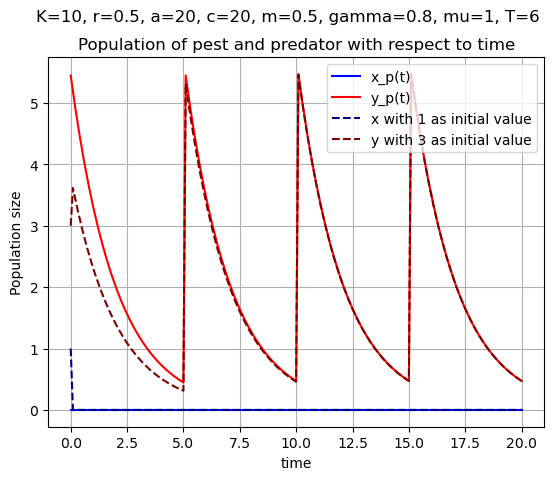

In [13]:
plt.plot(t, x_p, color = (0,0,1), label = 'x_p(t)')
plt.plot(t, y_p, color = (1,0,0), label = 'y_p(t)')
plt.plot(t, x_a, color = (0,0,0.5), linestyle='--', label='x with 1 as initial value')
plt.plot(t, y_a, color = (0.5,0,0), linestyle='--', label='y with 3 as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator with respect to time')
plt.suptitle('K=10, r=0.5, a=20, c=20, m=0.5, gamma=0.8, mu=1, T=6')
plt.legend()
plt.grid()
plt.show()

## Attempt to solve the ODE in one function

In [19]:
def solve_ode(
    xy: np.ndarray,
    r: float = 0.5,
    K: float = 10,
    a: float = 20,
    c: float = 20,
    m: float = 0.5,
    gamma: float = 0.8,
    mu: float = 1,
    T: float = 5,
    t: np.ndarray = np.linspace(0,20,201)
        
) -> np.ndarray:
    '''This function gives the anwser of the semi-discrete ODE system with the chosen model 
    
    Param:
        model: the chosen model
        xy: put the initial value here. It will be changed along the for loop
        r: growth rate
        K: carrying capacity
        a: search rate
        c: half-saturation constant
        m: death rate
        gamma: conversion factor
        mu: release rate
        T: release period
        t: vector of time points
        
    Return:
        x, y: values of the solution (x, y) of the ODE at the time points t'''
    
    #Store solution in arrays
    x = np.empty_like(t)
    y = np.empty_like(t)

    #Record initial conditions
    x[0] = xy[0]
    y[0] = xy[1]

    #Solve ODE
    xy_step = xy
    for i in range(1,len(t)):
        #Span for next time step
        tspan = [t[i-1],t[i]] 
        #Solve for next step
        xy_step = odeint(sd_model, xy_step, tspan, args=(r, K, a, c, m, gamma)) 
        x[i] = xy_step[1][0] #add a value to x
        if t[i-1] % T == 0 and t[i-1] > 0:
            print('release period at', t[i-1])
            y[i] = y[i-1] + mu*T #add a value to if t is a multiple of T
        else:
            y[i] = xy_step[1][1] #add a value to if t is not a multiple of T
        #next initial condition
        xy_step = [x[i],y[i]]

    return x, y

Try the function. We need to have the same graph as above

Run the function for the periodical solution

In [20]:
#Initial conditions
mu = 1
T = 5
m=0.5
y_p_0_test = mu*T/(1 - np.exp(-m*T))
xy_p_0_test = [0, y_p_0_test]

In [21]:
#Solve ODE
xy_p_test = solve_ode(xy_p_0_test)

release period at 5.0
release period at 10.0
release period at 15.0


In [24]:
x_p_test = xy_p_test[0]
y_p_test = xy_p_test[1]

Run the function for the initial value [1, 3]

In [22]:
#Initial condition
x0_test = 1 
y0_test = 3
x0y0_test = [x0_test, y0_test]

In [23]:
#Solve ODE
xy_test = solve_ode(x0y0_test)

release period at 5.0
release period at 10.0
release period at 15.0


In [25]:
x_test = xy_test[0]
y_test = xy_test[1]

Plot the figures

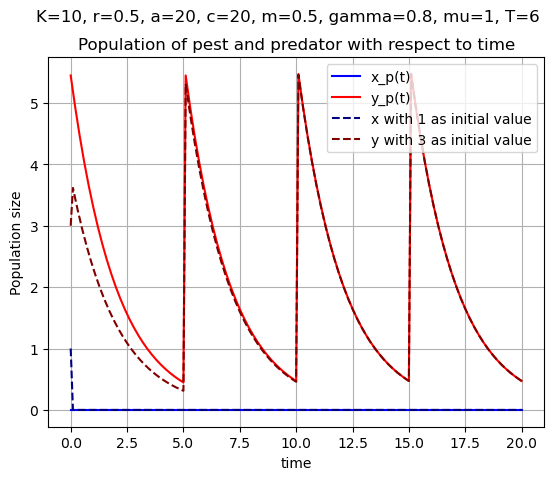

In [26]:
plt.plot(t, x_p_test, color = (0,0,1), label = 'x_p(t)')
plt.plot(t, y_p_test, color = (1,0,0), label = 'y_p(t)')
plt.plot(t, x_test, color = (0,0,0.5), linestyle='--', label='x with 1 as initial value')
plt.plot(t, y_test, color = (0.5,0,0), linestyle='--', label='y with 3 as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator with respect to time')
plt.suptitle('K=10, r=0.5, a=20, c=20, m=0.5, gamma=0.8, mu=1, T=6')
plt.legend()
plt.grid()
plt.show()